# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [66]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

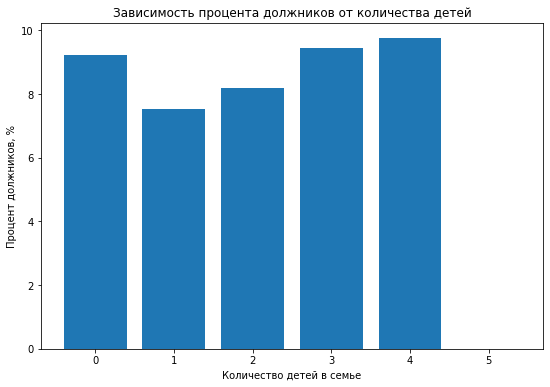

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
import matplotlib.pyplot as plt

вввввв
debtors = data.groupby('children')['debt'].sum()
clients = data.groupby('children')['debt'].count()
result = debtors / clients * 100

plt.figure(figsize = (9, 6))
plt.bar(data['children'].unique(), result)
plt.title('Зависимость процента должников от количества детей')
plt.xlabel('Количество детей в семье')
plt.ylabel('Процент должников, %')
plt.show()

**Вывод:** Согласно получившемуся графику зависимости, лучше выплачивают кредиты клиенты с 1 ребёнком. Околонулевой процент должников среди семей с 5 детьми связан с их редкостью.

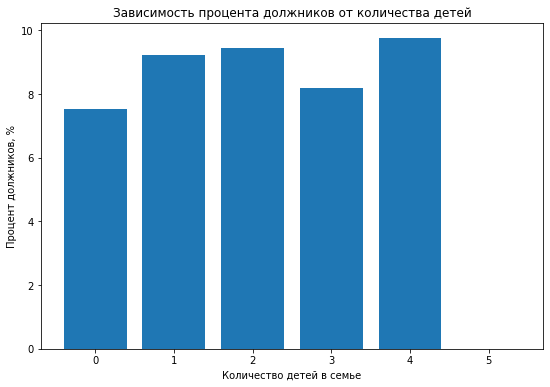

          debt  clients  percent_debt
children                             
0         1063    14091      7.543822
1          444     4808      9.234609
2          194     2052      9.454191
3           27      330      8.181818
4            4       41      9.756098
5            0        9      0.000000


In [62]:
# Новый код

import matplotlib.pyplot as plt


debtors = data.groupby('children')['debt'].sum()
clients = data.groupby('children')['debt'].count()
result = debtors / clients * 100


plt.figure(figsize = (9, 6))
plt.bar(result.index, result)
plt.title('Зависимость процента должников от количества детей')
plt.xlabel('Количество детей в семье')
plt.ylabel('Процент должников, %')
plt.show()

summary_table = data.groupby(['children']).agg({'debt':'sum'})
summary_table['clients'] = data.groupby('children')['debt'].count()
summary_table['percent_debt'] = result
print(summary_table)

Согласно получившемуся графику зависимости, лучше выплачивают кредиты клиенты без детей. Хуже всех кредиты выплачивают семьи с 2 детьми. Нулевой процент должников среди семей с 5 детьми связан с их редкостью,а максимальное значение у группы с 4 детьми, объясняется их малой выборкой.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

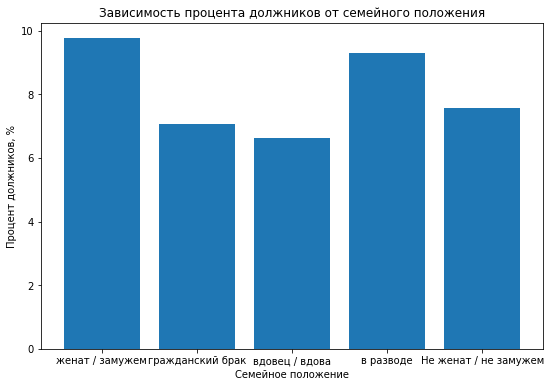

In [24]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
import matplotlib.pyplot as plt

debtors = data.groupby('family_status')['debt'].sum()
clients = data.groupby('family_status')['debt'].count()
result = debtors / clients * 100

plt.figure(figsize = (9, 6))
plt.bar(data['family_status'].unique(), result)
plt.title('Зависимость процента должников от семейного положения')
plt.xlabel('Семейное положение')
plt.ylabel('Процент должников, %')
plt.show()

**Вывод:** Исходя из полученных данных, можно сделать вывод о том, что потенциальные заёмщики, которые находятся в браке или в разводе попадают в группу риска должников. А самыми безопасными для банка являются клиенты, которые не состоят или никогда не состояли в официальном браке.

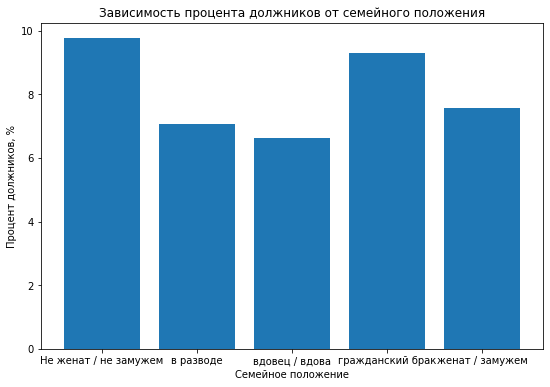

                       debt  clients  percent_debt
family_status                                     
Не женат / не замужем   273     2796      9.763948
в разводе                84     1189      7.064760
вдовец / вдова           63      951      6.624606
гражданский брак        385     4134      9.313014
женат / замужем         927    12261      7.560558


In [69]:
# Новый код
import matplotlib.pyplot as plt

debtors2 = data.groupby('family_status')['debt'].sum()
clients2 = data.groupby('family_status')['debt'].count()
result2 = debtors2 / clients2 * 100

plt.figure(figsize = (9, 6))
plt.bar(result2.index, result2)
plt.title('Зависимость процента должников от семейного положения')
plt.xlabel('Семейное положение')
plt.ylabel('Процент должников, %')
plt.show()

summary_table2 = data.groupby(['family_status']).agg({'debt':'sum'})
summary_table2['clients'] = data.groupby('family_status')['debt'].count()
summary_table2['percent_debt'] = result2
print(summary_table2)

**Новый вывод:** Исходя из полученных данных, можно сделать вывод о том, что потенциальные заёмщики, которые находятся в гражданском браке или не женаты/не замужем попадают в группу риска должников. А самыми безопасными для банка являются вдовцы/вдовы.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

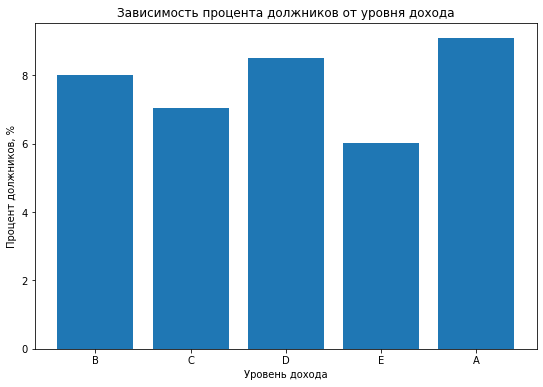

Количество клиентов по уровню дохода
 C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64


In [59]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

import matplotlib.pyplot as plt

debtors = data.groupby('total_income_category')['debt'].sum()
clients = data.groupby('total_income_category')['debt'].count()
result = debtors / clients * 100

plt.figure(figsize = (9, 6))
plt.bar(data['total_income_category'].unique(), result)
plt.title('Зависимость процента должников от уровня дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Процент должников, %')
plt.show()

print('Количество клиентов по уровню дохода\n', data['total_income_category'].value_counts())

**Вывод:** На основании полученных данных заметно, что потенциальные заёмщики со "средним" уровнем дохода (С) выглядят предпочтительнее для банка. Значения граничных групп Е и А считаю неподходящими из-за слишком малого количества клиентов.

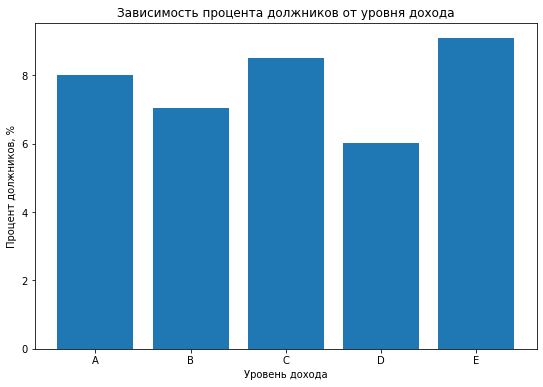

                       debt  clients  percent_debt
total_income_category                             
A                         2       25      8.000000
B                       354     5014      7.060231
C                      1353    15921      8.498210
D                        21      349      6.017192
E                         2       22      9.090909


In [60]:
# Новый код
import matplotlib.pyplot as plt

debtors3 = data.groupby('total_income_category')['debt'].sum()
clients3 = data.groupby('total_income_category')['debt'].count()
result3 = debtors3 / clients3 * 100

plt.figure(figsize = (9, 6))
plt.bar(result3.index, result3)
plt.title('Зависимость процента должников от уровня дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Процент должников, %')
plt.show()

summary_table3 = data.groupby(['total_income_category']).agg({'debt':'sum'})
summary_table3['clients'] = data.groupby('total_income_category')['debt'].count()
summary_table3['percent_debt'] = result3
print(summary_table3)

**Новый вывод:** На основании полученных данных заметно, что потенциальные заёмщики с уровнем дохода D выглядят предпочтительнее для банка. Самая многочисленная группа с уровнем дохода С является и самой рискованной. Значения граничных групп Е и А считаю неподходящими из-за слишком малого количества клиентов.

#### Как разные цели кредита влияют на его возврат в срок?

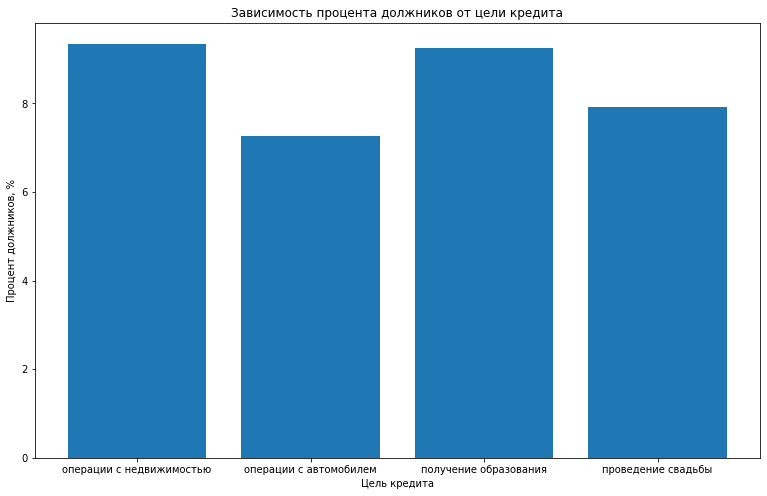

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

import matplotlib.pyplot as plt

debtors = data.groupby('purpose_category')['debt'].sum()
clients = data.groupby('purpose_category')['debt'].count()
result = debtors / clients * 100

plt.figure(figsize = (13, 8))
plt.bar(data['purpose_category'].unique(), result)
plt.title('Зависимость процента должников от цели кредита')
plt.xlabel('Цель кредита')
plt.ylabel('Процент должников, %')
plt.show()


**Вывод:** Самыми безопасными для банка являются "автомобильные" кредиты - среди клиентов с такой целью кредита меньше всего должников. А больше всего шансов не погасить кредит вовремя у клиентов, которые берут кредит на недвижимость и образование.

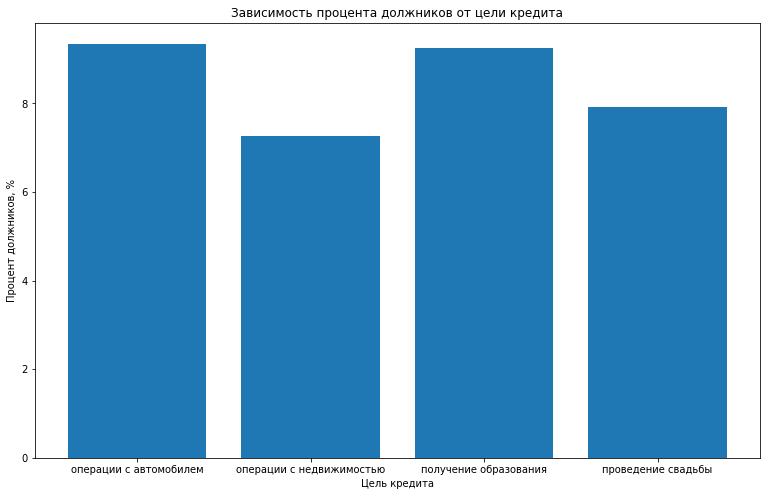

                          debt  clients  percent_debt
purpose_category                                     
операции с автомобилем     400     4279      9.347978
операции с недвижимостью   780    10751      7.255139
получение образования      369     3988      9.252758
проведение свадьбы         183     2313      7.911803


In [68]:
# Новый код

import matplotlib.pyplot as plt

debtors4 = data.groupby('purpose_category')['debt'].sum()
clients4 = data.groupby('purpose_category')['debt'].count()
result4 = debtors4 / clients4 * 100

plt.figure(figsize = (13, 8))
plt.bar(result4.index, result4)
plt.title('Зависимость процента должников от цели кредита')
plt.xlabel('Цель кредита')
plt.ylabel('Процент должников, %')
plt.show()

summary_table4 = data.groupby(['purpose_category']).agg({'debt':'sum'})
summary_table4['clients'] = data.groupby('purpose_category')['debt'].count()
summary_table4['percent_debt'] = result4
print(summary_table4)

**Новый вывод:** Самыми безопасными для банка являются операции с недвижимостью - среди клиентов с такой целью кредита меньше всего должников. А больше всего шансов не погасить кредит вовремя у клиентов, которые берут кредит на образование или автомобиль.

#### Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски в исходных данных находятся в столбцах 'days_employed' и 'total_income', то есть связаны с информацией, которую предоставляет работодатель. Значит возможными причинами могут являться:
- Потенциальный заёмщик безработный;
- Потенциальный заёмщик никогда не работал;
- Часть данных не была/не успела быть обработана.

#### Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнение пропусков медианным значением является лучшим решением для колличественных переменных, так как некоторые значения могут сильно выделяться из всего набора и медиана будет более объективно отображать информацию, нежели среднее значение.

### Общий вывод.

**Предобработка данных:**

* В ходе предобработки данных было обнаружено 2174 пропуска в столбцах, содержащих информацию о доходе и трудовом стаже. Возможными причинами явлются: человеческий фактор, технические проблемы и повреждение файла с данными. Пропуски были заполненны медианными значениями, так как в данном случае они объективнее отражают информацию, нежели среднее значение.
* Дополнительно в столбце с трудовым стажем были обнаружены аномальные значения (отрицательные) и заменены на положительные, а аномальные значения в столбце с количеством детей в семье были удалены.
* Так же найдено и удалено 71 дубликат строк.
    
**Результаты проекта:**

1. Наличие детей увеличивает риск потенциальных клиентов стать должниками.
2. Меньше всего должников среди вдов/вдовцов. А самыми "долговыми" являются не женатые/не замужем и находящиеся в гражданском браке клиенты.
3. Потенциальные клиенты с уровнем дохода D будут меньше всего подвержены риску стать должниками, тогда как категория С наиболее "опасна" для банка.
4. Клиенты, оформляющие кредит на недвижимость, имеют наименьший процент должников, тогда как с целью взять кредит на автомобиль или образование чаще остаются должниками.
    
На факт погашения кредита в срок влияют такие факторы как: количество детей, семейное положение, уровень дохода и цель кредита.
    
**Рекомендации**

Потенциальный клиент будет иметь наименьший риск стать должником, если:
* у него не будет детей
* вдова/вдовец
* имеет доход от 50 000 до 200 000
* берёт кредит на недвижимость
    
Для более объективной оценки способности потенциального заёмщика вернуть кредит необходимо учитывать все рассмотренные критерии: количество детей, семейное положение, уровень дохода и цель кредита.